In [ ]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Dataset : https://drive.google.com/drive/u/1/folders/1Q4o0-1jyx1bHBkeHmkO858PfkUvjHPgU

In [ ]:
# dataset
data=pd.read_csv('AirPassengers.csv')
data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
# data type
data['Month']=pd.to_datetime(data['Month'])

In [ ]:
# index
data.set_index('Month',inplace=True)

In [ ]:
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


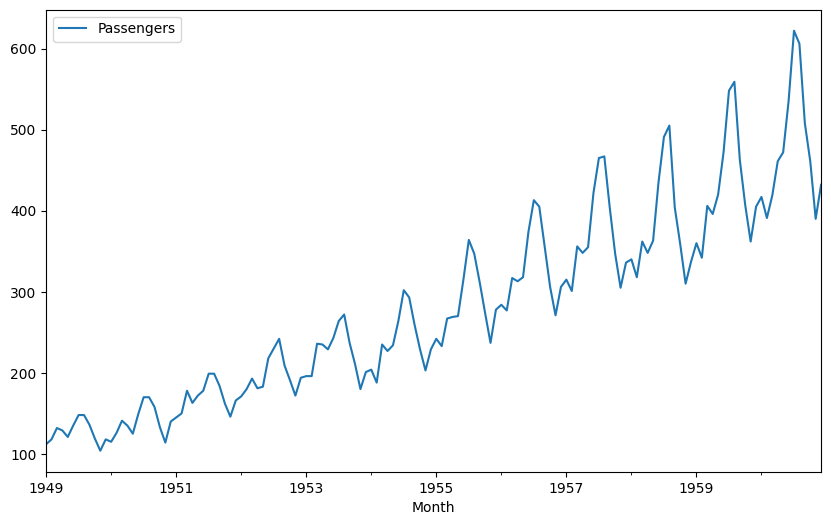

In [ ]:
# plot check additive or multiplicative
data.plot(figsize=(10,6))
plt.show()

In [ ]:
# isnull
data.isnull().sum().sum()

0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [ ]:
# check stationarity ---> ADF test
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(data['Passengers'])

In [ ]:
test_result   # 2nd value is p_value

(0.8153688792060498,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [ ]:
p_value=test_result[1]
p_value

0.991880243437641

In [ ]:
if p_value<0.05:
    print('Data is Stationary')
else:
    print('Data is Non-Stationary')

Data is Non-Stationary


In [ ]:
# try to make stationar --> trend ----> seasonality
rolling_mean=data.rolling(window=12).mean()
rolling_mean_detrended=data-rolling_mean

In [ ]:
rolling_mean_detrended[:13]

,Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


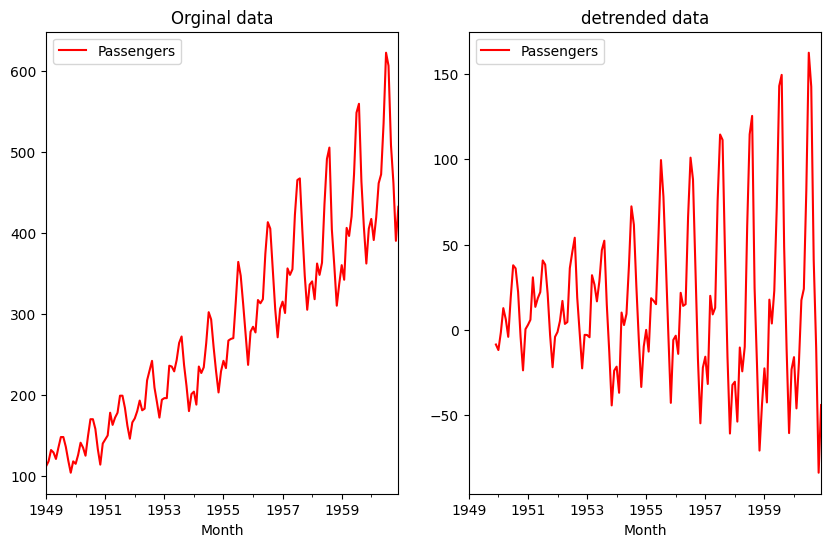

In [ ]:
ax1=plt.subplot(1,2,1)
data.plot(figsize=(10,6),color='red',title='Orginal data',ax=ax1)

ax2=plt.subplot(1,2,2)
rolling_mean_detrended.plot(figsize=(10,6),color='red',title='detrended data',ax=ax2)
plt.show()

In [ ]:
# remove seasonality
rolling_mean_detrended.head(15)

,Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [ ]:
rolling_mean_detrended.shift(3).head(15)

,Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [ ]:
# diff
rolling_mean_detrended_diff=rolling_mean_detrended-rolling_mean_detrended.shift()

In [ ]:
# dropna
rolling_mean_detrended_diff.dropna(inplace=True)

In [ ]:
rolling_mean_detrended_diff.head(15)

,Passengers
Month,
1950-01-01,-3.250000
1950-02-01,10.333333
1950-03-01,14.250000
1950-04-01,-6.500000
1950-05-01,-10.333333
1950-06-01,22.833333
1950-07-01,19.166667
1950-08-01,-1.833333
1950-09-01,-13.833333


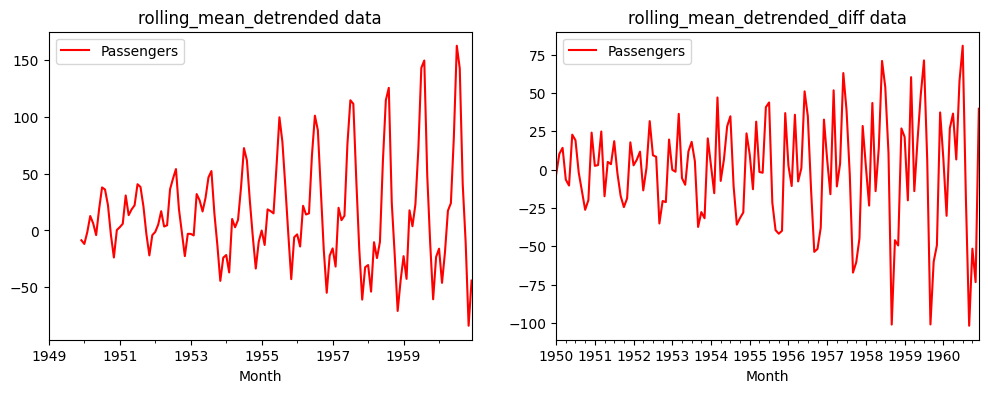

In [ ]:
ax1=plt.subplot(1,2,1)
rolling_mean_detrended.plot(figsize=(12,4),color='red',title='rolling_mean_detrended data',ax=ax1)

ax2=plt.subplot(1,2,2)
rolling_mean_detrended_diff.plot(figsize=(12,4),color='red',title='rolling_mean_detrended_diff data',ax=ax2)
plt.show()

In [ ]:
result=adfuller(rolling_mean_detrended_diff['Passengers'])
if result[1]<0.05:
    print('Data is Stationary')
else:
    print('Data is Non-Stationary')

Data is Stationary


# Now data is stationary

In [ ]:
# 10 yrs of data ( 9 data for train , 1 for test )
train=rolling_mean_detrended_diff.iloc[:120]['Passengers']
test=rolling_mean_detrended_diff.iloc[120:]['Passengers']

In [ ]:
print(train.shape)
train.head()

(120,)


,Passengers
Month,
1950-01-01,-3.250000
1950-02-01,10.333333
1950-03-01,14.250000
1950-04-01,-6.500000
1950-05-01,-10.333333


In [ ]:
print(test.shape)
test.head()

(12,)


,Passengers
Month,
1960-01-01,7.250000
1960-02-01,-30.083333
1960-03-01,26.916667
1960-04-01,36.583333
1960-05-01,6.666667


In [ ]:
# import arima
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
# Define and fit an ARIMA model with order (1, 1, 2)
# Create and fit the ARIMA model
import statsmodels.api as sm
model = sm.tsa.ARIMA(train, order=(1, 1, 2))
model_fit = model.fit()

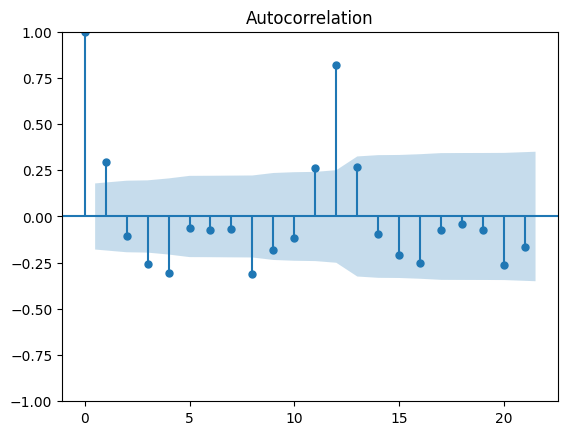

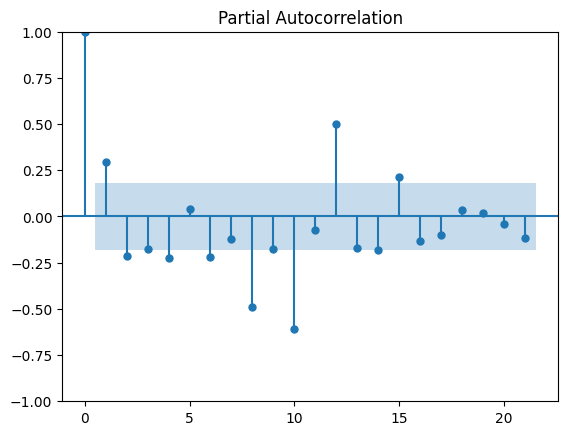

In [ ]:
# Step 2: Plot ACF and PACF to determine p and q
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(train)
plot_pacf(train)
plt.show()

In [ ]:
# model fit summary
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                  120
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -573.668
Date:                Wed, 13 Nov 2024   AIC                           1155.336
Time:                        11:30:45   BIC                           1166.453
Sample:                    01-01-1950   HQIC                          1159.850
                         - 12-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5310      0.101     -5.273      0.000      -0.728      -0.334
ma.L1         -0.0617     10.438     -0.006      0.995     -20.520      20.396
ma.L2         -0.9381      9.804     -0.096      0.924     -20.153      18.277
sigma2       861.2451   9020.600      0.095      0.924   -1.68e+04    1.85e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):                 1.78
Prob(Q):                              0.62   Prob(JB):                         0.41
Heteroskedasticity (H):               5.66   Skew:                            -0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
!pip install pmdarima

In [ ]:
from pmdarima import auto_arima

In [ ]:
# predict
rolling_mean_detrended_diff['predict']=model_fit.predict(start=len(train),end=len(train)+len(test)-1)
rolling_mean_detrended_diff['predict'].head()

,predict
Month,
1950-01-01,NaN
1950-02-01,NaN
1950-03-01,NaN
1950-04-01,NaN
1950-05-01,NaN


In [ ]:
len(train)

120

In [ ]:
len(train)+len(test)-1

131

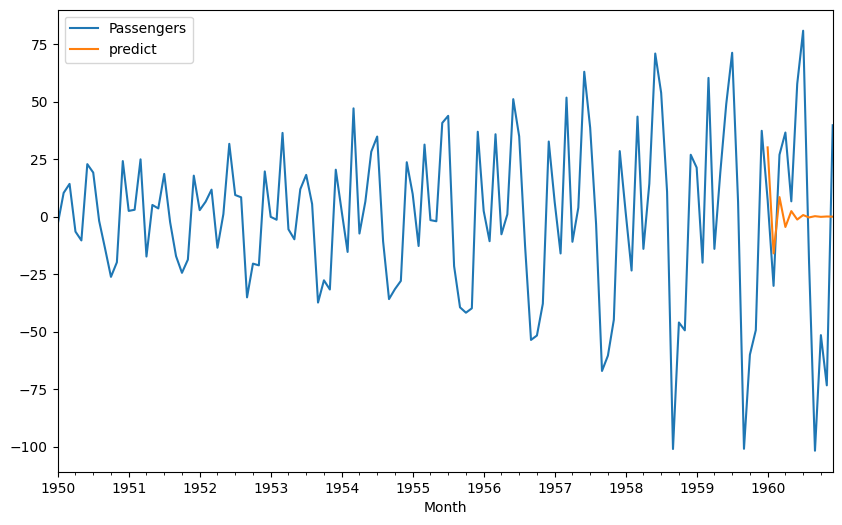

In [ ]:
rolling_mean_detrended_diff[['Passengers','predict']].plot(figsize=(10,6))
plt.show()

In [ ]:
# give best model for me
order=auto_arima(rolling_mean_detrended_diff['Passengers'])
order.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  132
Model:               SARIMAX(3, 0, 3)   Log Likelihood                -610.892
Date:                Wed, 13 Nov 2024   AIC                           1235.785
Time:                        11:31:31   BIC                           1255.964
Sample:                    01-01-1950   HQIC                          1243.985
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8644      0.162      5.346      0.000       0.548       1.181
ar.L2          0.2042      0.230      0.889      0.374      -0.246       0.654
ar.L3         -0.5267      0.140     -3.773      0.000      -0.800      -0.253
ma.L1         -0.9136      0.128     -7.154      0.000      -1.164      -0.663
ma.L2         -0.8209      0.168     -4.884      0.000      -1.150      -0.491
ma.L3          0.7468      0.095      7.850      0.000       0.560       0.933
sigma2       586.1896     67.804      8.645      0.000     453.297     719.082
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 2.56
Prob(Q):                              0.72   Prob(JB):                         0.28
Heteroskedasticity (H):               6.24   Skew:                             0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# SARIMAX best over Arima because seasonality

In [ ]:
# import sarimax
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(train,order=(3, 0, 3),seasonal_order=(3, 0, 3,12))
model=model.fit()

In [ ]:
# sariamx predict
rolling_mean_detrended_diff['predict']=model.predict(start=len(train),end=len(train)+len(test)-1)


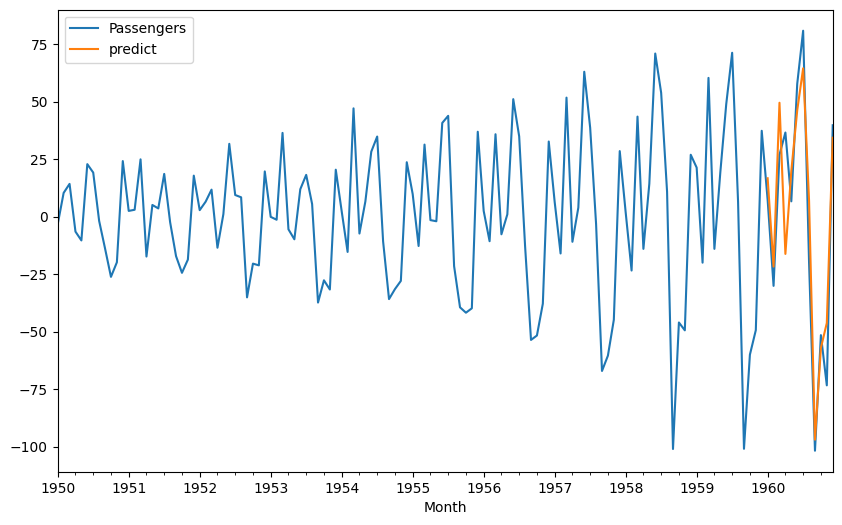

In [ ]:
rolling_mean_detrended_diff[['Passengers','predict']].plot(figsize=(10,6))
plt.show()

<Axes: xlabel='Month'>

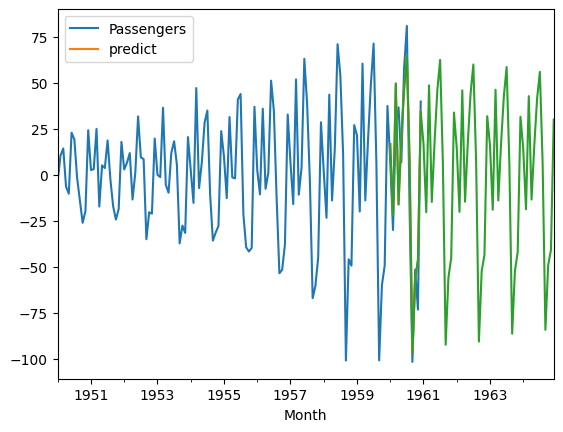

In [ ]:
# forcast
forecast=model.forecast(steps=60) # 60 months
rolling_mean_detrended_diff.plot()
forecast.plot()